In [1]:
import findspark
findspark.init()

In [22]:
import pandas as pd
import seaborn as sns

In [3]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.rdd import RDD
import pyspark.sql.functions as F
import pandas as pd
import random

In [4]:

# Initialize Spark session
conf = SparkConf().setAppName("HashPartitionerExample").setMaster("local")
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

# spark = SparkSession.builder.appName("TestPartition").getOrCreate()



In [12]:
data = pd.read_csv('data.csv')


In [19]:
data['price'].value_counts()

price
0        43
16500    26
13900    21
15500    19
15000    19
         ..
12560     1
11760     1
7340      1
6530      1
30100     1
Name: count, Length: 790, dtype: int64

The skewness of Price column is:  0.9227307836499805


<Axes: xlabel='price', ylabel='Count'>

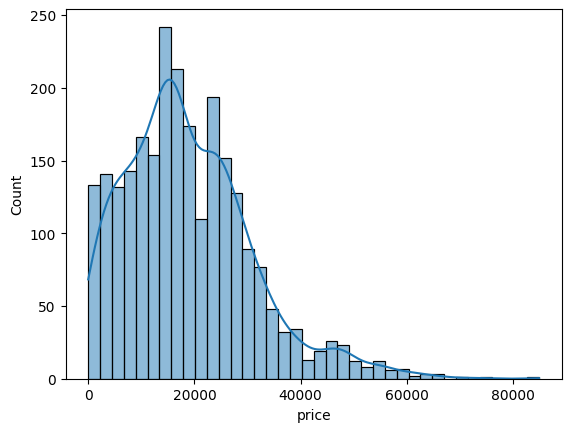

In [23]:
# Checking the skewness of Price column of dataset
print("The skewness of Price column is: ", data['price'].skew())
#density plot
sns.histplot(data['price'], kde = True)

In [ ]:
data = data['price'].sort_values()
data = data.tolist()
# make data into key-value pairs
data = [(i, f"value_{i}") for i in data]

In [6]:
print(data)

[(0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 

In [7]:
rdd = sc.parallelize(data, 4)


## HashPartitioner

In [8]:
# Simulate HashPartitioner by partitioning using a hash function
def hash_partitioner(key):
    return hash(key) % 4 
# What this function does is to return the remainder of the division of the hash of the key by 4.

hash_partitioned_rdd = rdd.partitionBy(4, partitionFunc=hash_partitioner)


print("Number of items per partition after HashPartitioning:",hash_partitioned_rdd.glom().map(len).collect())



Number of items per partition after HashPartitioning: [2150, 64, 200, 85]


## RangePartitioner

In [9]:
# Custom range partitioner
def range_partitioner(key):
    if key < 10000:
        return 0
    elif 10000 <= key < 20000:
        return 1
    elif 20000 <= key < 40000:
        return 2
    else:
        return 3

range_partitioned_rdd = rdd.partitionBy(4, partitionFunc=range_partitioner)

print("Number of items per partition after RangePartitioning:",range_partitioned_rdd.glom().map(len).collect())


Number of items per partition after RangePartitioning: [609, 873, 874, 143]


## Salt

In [10]:
# Salt the keys to distribute the skewed data
def salt_key(key, num_salts=4):
    salt = random.randint(0, num_salts-1)
    return (f"{salt}_{key}", key)

salted_partitioned_rdd = rdd.map(lambda x: (salt_key(x[0]),x[1])).partitionBy(4, partitionFunc=hash_partitioner)

print("Number of items per partition after salting and HashPartitioning:",salted_partitioned_rdd.glom().map(len).collect())

Number of items per partition after salting and HashPartitioning: [655, 649, 566, 629]


# Draft

In [5]:


data = pd.read_csv(r"F:\FPT\DE_assignments\080824\SparkScripts\input\numbers.txt")


[(0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (0, 'value_0'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 'value_25'), (25, 

In [11]:
# Number of partitions
num_partitions = 9
# Define schema and create DataFrame
df = spark.createDataFrame(data, ["value"])

# Repartition DataFrame into specified number of partitions
df = df.repartition(num_partitions)

In [12]:
# Show the key-value pair of partition ID and count of records in each partition
df.groupBy(F.spark_partition_id()).count().show()

+--------------------+-------+
|SPARK_PARTITION_ID()|  count|
+--------------------+-------+
|                   0|1111110|
|                   1|1111111|
|                   2|1111111|
|                   3|1111111|
|                   4|1111110|
|                   5|1111112|
|                   6|1111113|
|                   7|1111110|
|                   8|1111111|
+--------------------+-------+



In [10]:
# access the underlying RDD and pull data by partition
df.rdd.glom().collect()


[[Row(value=71017523),
  Row(value=56478764),
  Row(value=77119130),
  Row(value=64976099),
  Row(value=59591651),
  Row(value=3034031),
  Row(value=87895655),
  Row(value=51409763),
  Row(value=75132405),
  Row(value=48725574),
  Row(value=34863958),
  Row(value=92598281),
  Row(value=20604499),
  Row(value=38576629),
  Row(value=46006772),
  Row(value=16026),
  Row(value=65666230),
  Row(value=59065442),
  Row(value=1817041),
  Row(value=51070164),
  Row(value=14584738),
  Row(value=63645352),
  Row(value=18326817),
  Row(value=90892012),
  Row(value=85586685),
  Row(value=36459590),
  Row(value=31195760),
  Row(value=26145692),
  Row(value=56554989),
  Row(value=19457432),
  Row(value=91078595),
  Row(value=95075340),
  Row(value=30362060),
  Row(value=54971692),
  Row(value=25290599),
  Row(value=19067374),
  Row(value=21214238),
  Row(value=31425849),
  Row(value=9789408),
  Row(value=20175613),
  Row(value=77572501),
  Row(value=8084977),
  Row(value=40123144),
  Row(value=531991

using the .glom() method, you can easily overload your memory. If you’re working with large datasets, be sure to downsample so that whatever your collecting can fit into RAM.